
# Probabilistic Classification using Naïve Bayes  
## Scenario 2 – Gaussian Naïve Bayes (Iris Dataset)

**Student Name:** Satheesh  
**Roll No:** 24BAD107

## Step 1: Import Required Libraries

In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


## Step 2: Load Iris Dataset

In [2]:

iris = load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names

print("Feature names:", feature_names)
print("Target classes:", iris.target_names)
print("Dataset shape:", X.shape)


Feature names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Target classes: ['setosa' 'versicolor' 'virginica']
Dataset shape: (150, 4)


## Step 3: Data Inspection

In [3]:

df = pd.DataFrame(X, columns=feature_names)
df['species'] = y
df.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


## Step 4: Feature Scaling

In [4]:

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


## Step 5: Train-Test Split

In [5]:

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)


## Step 6: Train Gaussian Naïve Bayes

In [6]:

model = GaussianNB()
model.fit(X_train, y_train)


GaussianNB()

## Step 7: Predictions

In [7]:

y_pred = model.predict(X_test)


## Step 8: Model Evaluation

In [8]:

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



## Step 9: Confusion Matrix

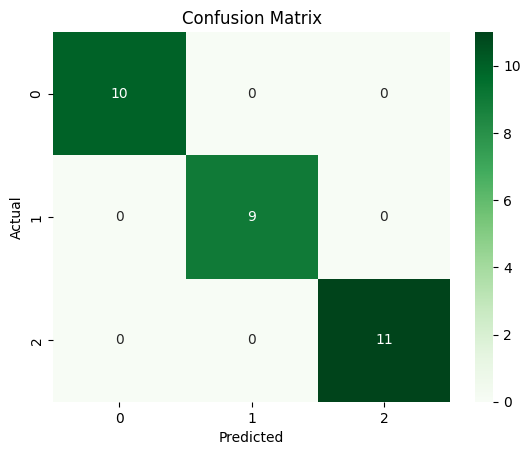

In [9]:

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Greens")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


## Step 10: Class Probabilities

In [10]:

probs = model.predict_proba(X_test[:5])
print("Class probabilities for first 5 test samples:")
print(probs)


Class probabilities for first 5 test samples:
[[5.97322611e-090 9.95635768e-001 4.36423247e-003]
 [1.00000000e+000 4.96157683e-014 6.54921950e-021]
 [7.31861098e-290 4.92947289e-012 1.00000000e+000]
 [2.81838335e-094 9.77593560e-001 2.24064404e-002]
 [1.13876385e-105 8.70022604e-001 1.29977396e-001]]


## Step 11: Compare with Logistic Regression

In [11]:

lr = LogisticRegression(max_iter=200)
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)

print("Logistic Regression Accuracy:", accuracy_score(y_test, lr_pred))


Logistic Regression Accuracy: 1.0


## Step 12: Decision Boundary (Using Two Features)

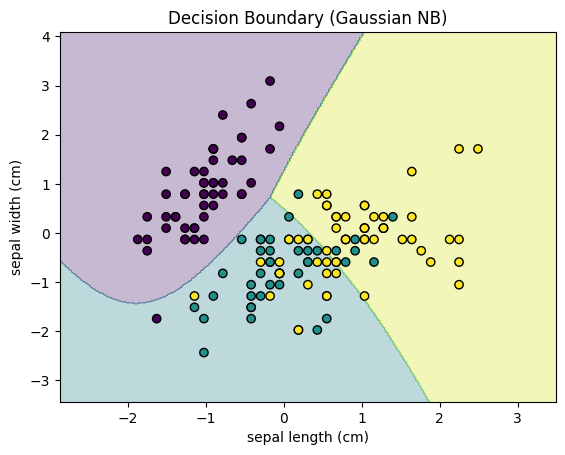

In [12]:

X2 = X_scaled[:, :2]
X2_train, X2_test, y2_train, y2_test = train_test_split(
    X2, y, test_size=0.2, random_state=42
)

model2 = GaussianNB()
model2.fit(X2_train, y2_train)

h = 0.02
x_min, x_max = X2[:, 0].min() - 1, X2[:, 0].max() + 1
y_min, y_max = X2[:, 1].min() - 1, X2[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

Z = model2.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(X2[:,0], X2[:,1], c=y, edgecolor='k')
plt.xlabel(feature_names[0])
plt.ylabel(feature_names[1])
plt.title("Decision Boundary (Gaussian NB)")
plt.show()


## Step 13: Feature Distribution by Class

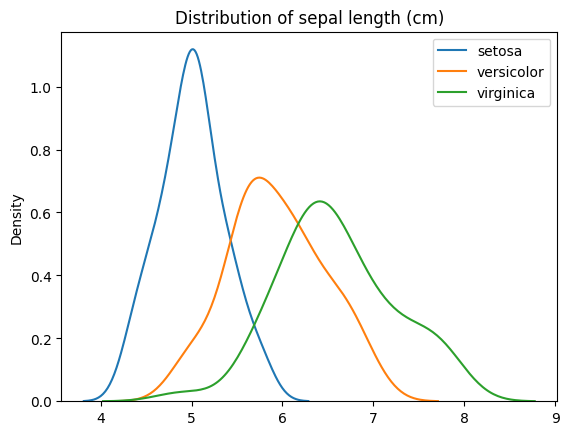

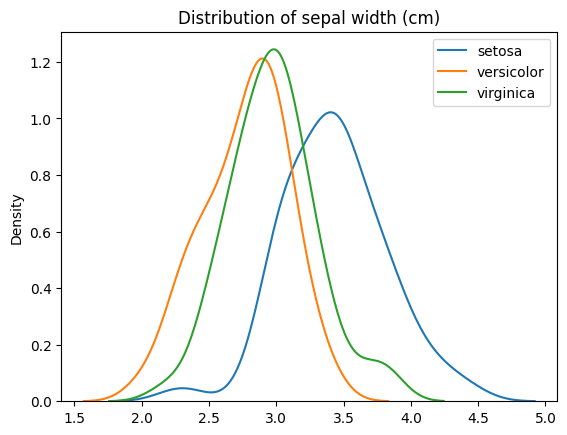

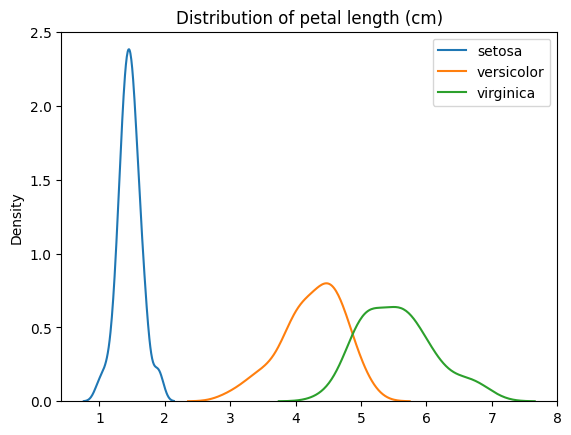

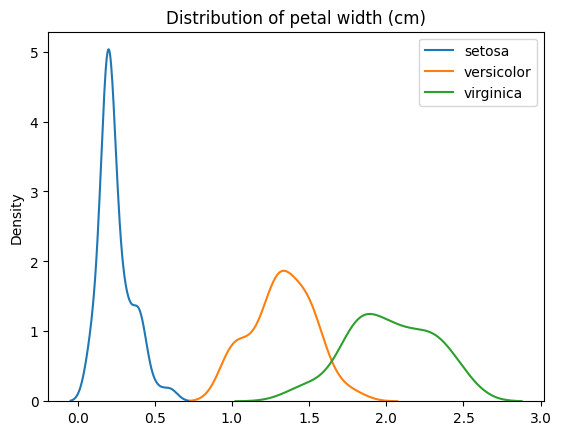

In [13]:

for i, feature in enumerate(feature_names):
    plt.figure()
    for label in np.unique(y):
        sns.kdeplot(X[y==label, i], label=iris.target_names[label])
    plt.title(f"Distribution of {feature}")
    plt.legend()
    plt.show()
